# Overview of functions from cross interactions

Overview of python functions from `biosspheres.laplace.crossinteractions` and `biosspheres.helmholtz.crossinteractions`.

In [1]:
import biosspheres.laplace.crossinteractions as lacross
import biosspheres.helmholtz.crossinteractions as helmcross

In [2]:
import numpy as np
import scipy.special
import biosspheres.quadratures.sphere as quadratures
import matplotlib.pyplot as plt

## Preliminaries

### Geometry


$N$ disjoint spheres in $\mathbb{R}^3$:
- Position vectors of the sphere centers: $\mathbf{p_j} \in \mathbb{R}^3$, with $j \in \{1,...,N\}$.  
- Radii: $\tilde{r}_j\in \mathbb{R}^+$, with $j \in \{1,...,N\}$.
- Interior of sphere $j$: $\Omega_j:=\{ \mathbf{x} \in \mathbb{R}^3:||\mathbf{x}-\mathbf{p_j}||_2<\tilde{r}_j \}$.
- Boundary of sphere $j$: $\Gamma_j:=\partial \Omega_j$.
- Exterior medium, $\Omega_0$: defined as $\mathbb{R}^3$ without the spheres and their boundaries.


### Free space fundamental solution for the Laplace equation

The free space fundamental solution of the Laplace equation, which satisfies the radiation condition is:
$$g\left(\mathbf{r},\mathbf{r'}\right):= \frac{1}{4\pi ||\mathbf{r}-\mathbf{r}'||_2}, \quad \mbox{with } \mathbf{r}\not = \mathbf{r'}, \quad \mbox{and } -\Delta g \left(\mathbf{r},\mathbf{r'}\right)=\delta \left(\mathbf{r}-\mathbf{r'}\right).$$

### Free space fundamental solution for the Helmholtz equation


The free space fundamental solution of the Helmholtz equation with $k>0$, which satisfies the **radiation condition** is:
$$g_j\left(\mathbf{r},\mathbf{r'}\right):= \frac{e^{ik_j||\mathbf{r}-\mathbf{r}'||}}{4\pi ||\mathbf{r}-\mathbf{r}'||}, \quad \mbox{with } \mathbf{r}\not = \mathbf{r'}, \quad \mbox{and } -\left( \Delta + k_j^2 \right) g_j \left(\mathbf{r},\mathbf{r'}\right)=\delta \left(\mathbf{r}-\mathbf{r'}\right).$$

### Layer operators

Single and double layer operators defined for smooth densities:
$$DL_{0j} \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  \psi\left(\mathbf{r}'\right) \nabla g_0\left(\mathbf{r},\mathbf{r'}\right) \cdot \widehat{\mathbf{n}}_{0j} \ dS',$$
$$SL_{0j} \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}'\right) g_0\left(\mathbf{r},\mathbf{r'}\right) dS'},$$
$$DL_j \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}'\right) \nabla g_j\left(\mathbf{r},\mathbf{r'}\right) \cdot \widehat{\mathbf{n}}_{j} \ dS'},$$
$$SL_j \left(\psi\right)\left(\mathbf{r}\right):=\int_{\Gamma_j}  {\psi\left(\mathbf{r}' \right) g_j\left(\mathbf{r},\mathbf{r'}\right) dS'}$$

with the gradient being taken with respect to $\mathbf{r}'$, $\widehat{\mathbf{n}}_j$ being the exterior normal vector of $\Omega_j$, and $\widehat{\mathbf{n}}_j=-\widehat{\mathbf{n}}_{0j}$.

These operators are linear and continuous in the following Sobolev spaces:
$$DL_{0j}: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc} \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right),$$
$$SL_{0j}: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc}  \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right)  , $$
$$DL_{j}: H^{\frac{1}{2}}(\Gamma_j)\rightarrow H^1_{loc} \left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right),$$
$$SL_{j}: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^1_{loc}\left(\mathbb{R}^3 \setminus \cup_{j=1}^{N}\Gamma_j\right).$$

### Boundary integral operators

For $u\in C^\infty(\overline\Omega)$, Dirichlet and Neumann traces operators are defined as 
$$\gamma_d u := u|_{\Gamma},\qquad \gamma_n u := \nabla  u|_{\Gamma} \cdot \widehat{n},$$
where $\widehat{n}$ is the exterior unit normal.

By density arguments, the definition of Dirichlet and Neumann traces operator can be extended to $u_j \in H^1_{loc}(\Omega_j)$, with $j \{0, ..., N \}$. We extend the notation as follows

$$\gamma_d^{0j} u_0 := u_0|_{\Gamma_j},$$
$$\gamma_d^{j} u_j := u_0|_{\Gamma_j},$$
$$\gamma_n^{0j} u_0 := \nabla u_0|_{\Gamma_j} \cdot \widehat{n}_{0j},$$
$$\gamma_n^{j} u_j := \nabla u_0|_{\Gamma_j}\cdot \widehat{n}_{j},$$
where $\widehat{n}_{j}$ is the exterior normal of $\Omega_j$, with $j\in \{ 1, ..., N\}$ and $\widehat{n}_{0j}=-\widehat{n}_{j}$.

Now, we recall the definition of the boundary integral operators:
$$\begin{align*}
	V_{i,j}^0 &:=  \frac{1}{2} \left( \gamma_d^{i} SL_{0j} + \gamma_d^{0i} SL_{0j} \right) ,
	& V_{j}&:= \frac{1}{2} \left(  \gamma_d^{0j} SL_{j} + \gamma_d^{j} SL_{j} \right) ,\\
	K_{i,j}^0&:= \frac{1}{2} \left(\gamma_d^{i} DL_{0j} + \gamma_d^{0i} DL_{0j} \right) ,
	&K_{j}&:= \frac{1}{2} \left(\gamma_d^{0j} DL_{j} + \gamma_d^{j} DL_{j} \right),\\
	K^{*0}_{i,j}&:= \frac{1}{2} \left( - \gamma_n ^{i} SL_{0j} + \gamma_n ^{0i} SL_{0j}  \right),
	 & K^{*}_{j} &:= \frac{1}{2} \left( -\gamma_n ^{0j} SL_{j}  + \gamma_n ^{j} SL_{j} \right), \\
	W_{i,j}^0 &:= -\frac{1}{2} \left( - \gamma_n^{i} DL_{0j}  + \gamma_n^{0i} DL_{0j} \right) ,
	& W_{j} &:=- \frac{1}{2} \left( -\gamma_n^{0j} DL_{j} + \gamma_n^{j} DL_{j} \right).
\end{align*}$$

These operators are linear and continuous in the following Sobolev spaces: 
$$\begin{align*}
	V_{{i},j}^0 &: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_i),
	&V_{j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_j),\\
	W_{{i},j}^0&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_i),
	&W_{j}&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_j) ,\\
	K_{{i},j}^0&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_i),
	&K_{j}&: H^{\frac{1}{2}}(\Gamma_j) \rightarrow H^{\frac{1}{2}}(\Gamma_j) ,\\
	K^{*0}_{{i},j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_i),
	&K^*_{j}&: H^{-\frac{1}{2}}(\Gamma_j) \rightarrow H^{-\frac{1}{2}}(\Gamma_j).
\end{align*}$$

Since the domains are smooth, the jump relations for the potentials across a closed boundary yield
$$\begin{align*}
	V_{{i},j}^0 &=   \gamma_d^{0{i}} SL_{0j},
	& V_{j}&=  \gamma_d^{j} SL_{j},\\
	W_{{i},j}^0 &=-  \gamma_n^{0{i}} DL_{0j},
	& W_{j} &=- \gamma_n^{j} DL_{j}, \\
	  K_{{i},j}^0&= \gamma_d^{0{i}} DL_{0j}\mbox{ with } {i} \not=j,
	 & K^{*0}_{{i},j} &= \gamma_n ^{0{i}} SL_{0j}\mbox{ with } {i}  \not=j,
\end{align*}$$
and
$$\begin{align*}
	K_{j,j}^0(\psi) &= \frac{1}{2}\psi +\gamma_d^{0j} {DL_{0j}(\psi)} ,
	&K_{j}(\psi) &= \frac{1}{2} \psi +\gamma_d^{j} {DL_{j}(\psi)} ,\\
	 K^{*0}_{j,j}(\psi) &= -\frac{1}{2} \psi + \gamma_n^{0j} {SL_{0j}(\psi)},
	&K^*_{j}(\psi) &= -\frac{1}{2} \psi + \gamma_n^j {SL_{j}(\psi)}.
\end{align*}$$

### Spherical coordinate system

A vector is written as $\mathbf{r}=\left(r,\varphi,\theta\right)^t$, with $r \in [0,\infty)$, $\varphi \in [0,2\pi)$ and $\theta \in [0,\pi]$, which in Cartesian coordinates is equivalent to $\mathbf{r}=r\left(\sin \theta \cos \varphi,\sin \theta \sin \varphi,\cos \theta\right)^t$. The unitary vectors of the spherical coordinate system can be written in Cartesian coordinates as
$$\begin{align*}
    &\widehat{\mathbf{e}}_r= (\sin \theta \cos \varphi , \sin \theta \sin \varphi , \cos \theta )^t, \\
    &\widehat{\mathbf{e}}_\theta=(\cos \theta \cos \varphi , \cos \theta \sin \varphi , -\sin \theta  )^t, \\
    &\widehat{\mathbf{e}}_{\varphi}=(-\sin \varphi , \cos \varphi , 0 )^t.
\end{align*}$$

Also, the gradient operator in spherical coordinates:
$$\begin{align*}
    \nabla f&=\frac{\partial f}{\partial r} \widehat{\mathbf{e}}_r+\frac{1}{r} \frac{\partial f}{\partial \theta} \widehat{\mathbf{e}}_\theta+\frac{1}{r \sin \theta} \frac{\partial f}{\partial \varphi} \widehat{\mathbf{e}}_{\varphi}
\end{align*}$$

### Associated Legendre functions

$P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x), \quad \mbox{with} \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

### Real spherical harmonics

Real spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$\begin{align}
		 Y_{l,m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0}) \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \cos m \varphi , \mbox{ and}\\
		Y_{l,-m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0})\frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \sin m \varphi ,
\end{align}$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise.

### Complex spherical harmonics

Complex spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$Y_{l,m}\left(\theta,\varphi\right) := \sqrt{ \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\left(\theta\right)\right) e^{i m \varphi}, \mbox{ and}$$
$$Y_{l,-m}\left(\theta,\varphi\right) := (-1)^m\overline{Y}_{l,m}\left(\theta,\varphi\right),$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwiactor.

### Orthonormality of spherical harmonics

Spherical harmonics are dense in $C(\mathbb{S}^2)$, with $\mathbb{S}^2$ the surface of the unit sphere, and form a complete orthonormal system in $L^2(\mathbb{S}^2)$ with respect to the internal product defined by:
$$\left( \psi , \xi \right)_{L^2(\mathbb{S}^2)} = \int_{0}^{2\pi}\int_{0}^{\pi} \psi\left(\theta,\varphi\right) \overline{\xi\left(\theta,\varphi\right) }\sin\left(\theta\right) d\theta d\varphi,$$
with $\overline{\xi\left(\theta,\varphi\right)}$ the conjugate of $\xi\left(\theta,\varphi\right)$.

They also are orthogonal in $H^1(\mathbb{S}^2)$.

### Reference systems

Let be $j\in \{1,...,N\}$. We define the reference system $j$ as the one centered at $\mathbf{p_j}$ with the same orientation that the reference system centered in the origin. Furthermore, we denote by $Y_{l,m,j}$ the spherical harmonic $Y_{l,m}$ centered in the origin of the reference system $j$. Thus, if $\left( r_j, \varphi_j, \theta_j \right) $ are the vector spherical coordinates of $\mathbf{r_j}$ in the reference system $j$, we have that $Y_{l,m,j}\left(\mathbf{r}_j\right)=Y_{l,m}\left(\theta_j, \varphi_j\right)$.

### Some spherical harmonics expansions

#### Real spherical harmonics and Laplace free space fundamental solution

Let $\mathbf{r}$, $\mathbf{r}'$ be vectors, whose spherical coordinates in the reference system $j$ are $\left(r_j,\theta_j, \varphi_j \right)$ and $\left(r_j',\theta_j', \varphi_j' \right)$, respectively. For $r_j>r_j'$ we have
$$g\left(\mathbf{r}, \mathbf{r}'\right) = \sum_{l=0}^{\infty}  \frac{1}{2l+1} \frac{r_j^{'l}}{r_j^{l+1}}\sum_{m=-l}^l Y_{l,m,j}\left(\mathbf{r}\right)  Y_{l,m,j}\left(\mathbf{r}'\right).$$
This series  and its term by term first derivatives with respect to $r_j$ or $r_j'$ are absolutely and uniformly convergent on compact subsets with $r_j>r_j'$.

Let be $j\in \{1,\ldots,N\}$, and $\tilde{r}_j$ the radius of $\Omega_j$.
- Let $\mathbf{r} \in \Omega_0$ and $\mathbf{r}=(r,\theta,\varphi )$ be expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &= -\frac{l}{2l+1} \left( \frac{\tilde{r}_j}{r} \right)^{l+1} Y_{l,m}(\theta, \varphi ),\\
    SL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &= \frac{\tilde{r}_j}{2l+1} \left( \frac{\tilde{r}_j}{r} \right)^{l+1} Y_{l,m}(\theta, \varphi ).
\end{align*}$$
- Let $\mathbf{r} \in \Omega_j$ and $\mathbf{r}=(r,\theta,\varphi )$ expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= -\frac{l+1}{2l+1} \left( \frac{r}{\tilde{r}_j} \right)^{l} Y_{l,m}(\theta, \varphi ),\\
    SL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= \frac{\tilde{r}_j}{2l+1} \left( \frac{r}{\tilde{r}_j} \right)^{l} Y_{l,m}(\theta, \varphi ).
\end{align*}$$

##### Cross-interactions

The following holds
$$\begin{align*}
\left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \left( V_{j,i}^0\left( Y_{p,q,i} \right) ; Y_{l,m,j} \right)_{L^2(\Gamma_j)},\\
\left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= - \frac{l}{\tilde{r}_j} \left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)}, \\
\left( K_{j,i}^{*0}\left( Y_{p,q,i} \right) ; Y_{l,m,j} \right)_{L^2(\Gamma_j)} &= \left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)}, \\
\left( W_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \frac{l}{\tilde{r}_j} \left( K_{i,j}^{*0}\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} .
\end{align*}$$
It can be deduced that the integrals of all the cross-interactions of a couple of spheres $i$ and $j$ can be derived having the results of the expression $\left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)}$ for all of the $l$, $m$, $p$ and $q$ needed, which avoids the need of computing numerically the other integral expressions.

#### Complex spherical harmonics and Helmholtz free space fundamental solution

Let $\mathbf{r}$, $\mathbf{r}'$ be vectors, whose spherical coordinates in the reference system $j$ are $\left(r_j,\theta_j, \varphi_j \right)$ and $\left(r_j',\theta_j', \varphi_j' \right)$, respectively. For $r_j>r_j'$ we have
$$g_j\left(\mathbf{r}, \mathbf{r}'\right) = i k_j \sum_{l=0}^{\infty}  j_l(k_j r_j') h_l^{(1)}(k_j r_j) \sum_{m=-l}^l Y_{l,m,j}\left(\mathbf{r}\right)  \overline{Y_{l,m,j}}\left(\mathbf{r}'\right),$$
with $j_l$ and $h_l^{(1)}$ the spherical Bessel function and the spherical Hankel function of first kind. This series  and its term by term first derivatives with respect to $r_j$ or $r_j'$ are absolutely and uniformly convergent on compact subsets with $r_j>r_j'$.

Let be $j\in \{1,\ldots,N\}$, and $\tilde{r}_j$ the radius of $\Omega_j$.
- Let $\mathbf{r} \in \Omega_0$ and $\mathbf{r}=(r,\theta,\varphi )$ be expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &= -i \left( k_0 \tilde{r}_j \right)^2 j_l' (k_0 \tilde{r}_j) h_l^{(1)}(k_0 r) Y_{l,m}(\theta, \varphi ),\\
    SL_{0j} ( Y_{l,m,j}) (\mathbf{r}) &=  i k_0 \tilde{r}_j^2 j_l (k_0 \tilde{r}_j) h_l^{(1)}(k_0 r) Y_{l,m}(\theta, \varphi ).
\end{align*}$$
- Let $\mathbf{r} \in \Omega_j$ and $\mathbf{r}=(r,\theta,\varphi )$ expressed in the $j$th spherical coordinate system, then
$$\begin{align*}
    DL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= i \left( k_j \tilde{r}_j \right)^2 h_l^{(1)'}(k_j \tilde{r}_j) j_l (k_j r)  Y_{l,m}(\theta, \varphi ),\\
    SL_{j} ( Y_{l,m,j}) (\mathbf{r}) &= i k_j \tilde{r}_j^2 h_l^{(1)}(k_j \tilde{r}_j) j_l (k_j r) Y_{l,m}(\theta, \varphi ).
\end{align*}$$

##### Cross-interactions

The following holds
$$\begin{align*}
\left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= (-1)^{m+q}\left( V_{j,i}^0\left( Y_{p,-q,i} \right) ; Y_{l,-m,j} \right)_{L^2(\Gamma_j)},\\
\left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= (-1)^{m+q}\left( K_{j,i}^0\left( Y_{p,-q,i} \right) ; Y_{l,-m,j} \right)_{L^2(\Gamma_j)},\\
\left( K_{j,i}^{*0}\left( Y_{p,q,i} \right) ; Y_{l,m,j} \right)_{L^2(\Gamma_j)} &= \overline{\left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)}}, \\
\left( W_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= (-1)^{m+q}\left( W_{j,i}^0\left( Y_{p,-q,i} \right) ; Y_{l,-m,j} \right)_{L^2(\Gamma_j)},
\end{align*}$$
If $j_l(k_0 \tilde{r}_j)\not=0$, the following holds
$$\begin{align*}
\left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= -k_0 \frac{j_l'(k_0 \tilde{r}_j)}{j_l(k_0 \tilde{r}_j)}\left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)},\\
\left( W_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= k_0 \frac{j_l'(k_0 \tilde{r}_j)}{j_l(k_0 \tilde{r}_j)} \left( K_{i,j}^{0*}\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)},
\end{align*}$$
These properties allow the reduction of the computations.

## Comments on the numerical algorithms implemented

Cross-interaction operators, e.g.~$V_{i,j}^0$ for  $i \not = j$, are non-singular and generally non diagonalizable. The double and single layer operators analytic expressions can be used to compute  the non-singular integrals for $i \not = j$: 
$$\begin{align}
	\left( V_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \int_{\Gamma_i} SL_{0j}(Y_{l,m,j}) Y_{p,q,i} \ d \Gamma_i ,\\
	\left( K_{i,j}^0\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \int_{\Gamma_i} DL_{0j}(Y_{l,m,j}) Y_{p,q,i}  \ d \Gamma_i,\\
	\left( K^{*0}_{i,j}\left( Y_{l,m,j} \right) ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= \int_{\Gamma_i}  \widehat{\mathbf{n}}_{0i} \cdot\nabla SL_{0j}(Y_{l,m,j})  Y_{p,q,i} \ d \Gamma_i,\\
	\left( W_{i,j}^0\left( Y_{l,m,j} \right)  ; Y_{p,q,i} \right)_{L^2(\Gamma_i)} &= - \int_{\Gamma_i}   \widehat{\mathbf{n}}_{0i}\cdot \nabla DL_{0j}(Y_{l,m,j}) Y_{p,q,i} \ d \Gamma_i .
\end{align}$$

Approximations of this integrals are provided via Gauss-Legendre quadratures. Specifically, along $\theta$, we use the change of variable $u=cos(\theta)$. Then, variable functions are sampled at the zeros of the Legendre Polynomial of degree $L_c+1$, whereas the trapezoidal rule is applied to equally spaced nodes in $\varphi$, with $2L_c+1$ points. If the function being integrated has a spherical harmonic expansion with coefficients equal to zero for degrees higher than $L_c$, then the quadrature yields the exact result, assuming that there are not other sources of error. Moreover, quadrature in $\varphi$ can be computed using the Fast Fourier Transform.

## `laplace.v_0_sj_semi_analytic_v1d`

This function returns a numpy array of two dimensions, which we will call `data_v`. The entries of the array are
$$data_v[p(2p + 1) + q, l(2l + 1) + m] = ( V_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}$$
with Laplace kernel.

### Docstring and comments

In [3]:
print(lacross.v_0_sj_semi_analytic_v1d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator V_{s,j}^0 with
    Laplace kernel evaluated and tested with real spherical harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not have performance
    improvements for the real spherical harmonic transform algorithm.
    
    Notes
    -----
    data_v[p(2p + 1) + q, l(2l + 1) + m] =
        ( V_{s,j}^0 Y_{l,m,j} ; Y_{p,q,s} )_{L^2(S_s)}
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.
    
    The expression V_{s,j}^0 Y_{l,m,j} is analytic. A quadrature scheme
    is used to compute the surface integral corresponding to the inner
    product.
    
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use

### Example

Parameter definitions:

In [4]:
radio_1 = 3.
radio_2 = 2.
rs = np.asarray([radio_1, radio_2])

In [5]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

In [6]:
big_l = 3
big_l_c = 25

Auxiliary parameters

In [7]:
final_length, pre_vector_t, transform = quadratures.real_spherical_harmonic_transform_1d(big_l, big_l_c)

In [8]:
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
    radio_2, p_1, p_2, final_length, pre_vector_t)
r_coord_2tf, phi_coord_2tf, cos_theta_coord_2tf = quadratures.from_sphere_s_cartesian_to_j_spherical_1d(
    radio_1, p_2, p_1, final_length, pre_vector_t)

Array computings

In [9]:
data_v21 = lacross.v_0_sj_semi_analytic_v1d(
    big_l, radio_1, radio_2, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)
data_v12 = lacross.v_0_sj_semi_analytic_v1d(
        big_l, radio_2, radio_1, r_coord_2tf, phi_coord_2tf,
        cos_theta_coord_2tf, final_length, transform)

For the properties in the preliminaries, `data_v21 = data_v12`$^t$, as this a numerical approximation, we will not have the equality.

Text(0.5, 1.0, 'Relative error between $V_{1,2}^0$ and $V_{2,1}^{0t}$.')

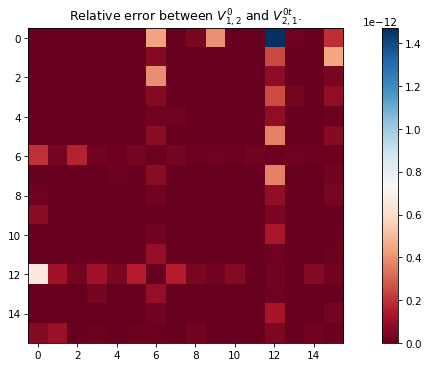

In [10]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v12 - np.transpose(data_v21)) / np.abs(data_v12)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Relative error between $V_{1,2}^0$ and $V_{2,1}^{0t}$.')

## `helmholtz.v_0_sj_semi_analytic_v1d`

This function returns a numpy array of two dimensions, which we will call `data_v`. The entries of the array are
$$data_v[p(2p + 1) + q, l(2l + 1) + m] = ( V_{s,j}^0 Y_{l,m,j} , Y_{p,q,s} )_{L^2(\mathcal{S}_s)}$$
with Helmholtz kernel.

### Docstring and comments

In [11]:
print(helmcross.v_0_sj_semi_analytic_v1d.__doc__)


    Returns a numpy array that represents a numerical approximation of
    the matrix formed by the boundary integral operator V_{s,j}^0 with
    Helmholtz kernel evaluated and tested with real spherical harmonics.
    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry or
    properties of the spherical harmonics.

    Notes
    -----
    data_v[p(2p + 1) + q, l(2l + 1) + m] =
        ( V_{s,j}^0 Y_{l,m,j} ; \conjugate{Y_{p,q,s}} )_{L^2(S_s)}
    Y_{l,m,j} : spherical harmonic degree l, order m, in the coordinate
        system j.
    S_s : surface of the sphere s.

    The expression V_{s,j}^0 Y_{l,m,j} is analytic. A quadrature scheme
    is used to compute the surface integral corresponding to the inner
    product.

    In this routine the quadrature points NEED to be ordered in an array
    of one dimension.
    It is a SLOW routine, because it does not use any symmetry or
    p

### Example

Parameter definitions:

In [27]:
radio_1 = 1.2
radio_2 = 3.

In [28]:
p_1 = np.asarray([2., 3., 4.])
p_2 = -p_1

In [29]:
k0 = 7.

In [37]:
big_l = 10
big_l_c = 40

Precomputations:

In [38]:
j_l_1 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_1 * k0)
j_l_2 = scipy.special.spherical_jn(np.arange(0, big_l + 1), radio_2 * k0)

In [39]:
final_length, pre_vector_t, transform = quadratures.complex_spherical_harmonic_transform_1d(big_l, big_l_c)
r_coord_1tf, phi_coord_1tf, cos_theta_coord_1tf = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_1d(
        radio_2, p_1, p_2, final_length, pre_vector_t))
r_coord_2tf, phi_coord_2tf, cos_theta_coord_2tf = (
    quadratures.
    from_sphere_s_cartesian_to_j_spherical_1d(
        radio_1, p_2, p_1, final_length, pre_vector_t))

In [40]:
data_v21 = helmcross.v_0_sj_semi_analytic_v1d(
    big_l, k0, radio_1, radio_2, j_l_1, r_coord_1tf, phi_coord_1tf,
    cos_theta_coord_1tf, final_length, transform)
data_v12 = helmcross.v_0_sj_semi_analytic_v1d(
    big_l, k0, radio_2, radio_1, j_l_2, r_coord_2tf, phi_coord_2tf,
    cos_theta_coord_2tf, final_length, transform)

Auxiliary arrays for comparing the arrays:

In [41]:
sign_array = np.diag(
        (-np.ones((big_l + 1)**2))**(np.arange(0, (big_l + 1)**2)))
giro_array = np.eye((big_l + 1)**2)
eles = np.arange(0, big_l+1)
l_square_plus_l = eles * (eles + 1)
for el in np.arange(1, big_l + 1):
    giro_array[l_square_plus_l[el] - el:l_square_plus_l[el] + el + 1,
               l_square_plus_l[el] - el:l_square_plus_l[el] + el + 1] = (
        np.fliplr(giro_array[
                  l_square_plus_l[el] - el:l_square_plus_l[el] + el + 1,
                  l_square_plus_l[el] - el:l_square_plus_l[el] + el + 1]))
aux = giro_array@sign_array@np.transpose(data_v21)@sign_array@giro_array

The following entries should be near zero:

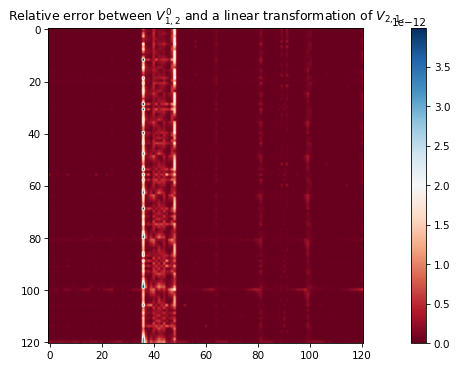

In [42]:
plt.figure(dpi=75., layout='constrained')
im = np.abs(data_v12 - aux) / np.abs(data_v12)
plt.imshow(im, cmap='RdBu')
plt.colorbar()
plt.title('Relative error between $V_{1,2}^0$ and'
          ' a linear transformation of $V_{2,1}$.')
plt.show()